In [1]:
#Import Necessary Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from nltk.corpus import stopwords
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import copy
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_validate
from sklearn.svm import LinearSVC
import gc #garbage collector
import time
from gensim.utils import lemmatize
#from pattern.en import parse

#------------------------------------------------------------------------#
import re #regular expression/pattern matching
import random
import nltk
import string
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer 
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('words')

#------------------------------------------------------------------------#

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,roc_curve
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

C:\Users\amsha\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amsha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\amsha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\amsha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\amsha\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\amsha\AppData\Roaming\

In [3]:
train_df = pd.read_csv("train_clean1.csv", encoding='utf8')
test_df = pd.read_csv("test_clean1.csv", encoding='utf8')
all_test_texts = ''.join(test_df.question_text.values.tolist())

print('Train:', train_df.shape)
print('Test:', test_df.shape)

Train: (1306122, 4)
Test: (375806, 3)


In [4]:
X_train = train_df['clean_question_text']
y_train = train_df['target']
X_test = test_df['clean_question_text']

# Check for Null values and fill them so that Vectorizer works fine
print("Total number of row with NaN values")
print(len(X_train[X_train.isnull()]))
X_train = X_train.fillna("_na_")
print("After Filing Null values")
print(X_train[X_train.isnull()])

print("Total number of row with NaN values")
print(len(X_test[X_test.isnull()]))
X_test = X_test.fillna("_na_")
print("After Filing Null values")
print(X_test[X_test.isnull()])

X_total = pd.concat([X_train,X_test],axis=0)
X_total = X_total.reset_index()['clean_question_text']
print('Total Train:', X_total.shape)
Y_train = train_df['target']

Total number of row with NaN values
85
After Filing Null values
Series([], Name: clean_question_text, dtype: object)
Total number of row with NaN values
37
After Filing Null values
Series([], Name: clean_question_text, dtype: object)
Total Train: (1681928,)


In [5]:
def remove_non_english_words(sent):
    sent = " ".join(w for w in nltk.wordpunct_tokenize(sent) \
             if w.lower() in words or not w.isalpha())
    return sent
words = set(nltk.corpus.words.words())
X_total = X_total.apply(lambda x: remove_non_english_words(x))

In [6]:
scorer = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
num_splits = 5

# This function shows how well the procedure performs on average
def show_avg_scores(cv_results, n_splits):
    print("Accuracy: " + str(np.mean(cv_results['test_accuracy'])))
    print("Precision: " + str(np.mean(cv_results['test_precision'])))
    print("Recall: " + str(np.mean(cv_results['test_recall'])))
    print("F_Score: " + str(np.mean(cv_results['test_f1'])))
    print("ROC AUC Mean: " + str(np.mean(cv_results['test_roc_auc'])))


# this function shows how much we expect the performance of the model to vary
def show_std_scores(cv_results, n_splits):
    print("Accuracy: " + str(np.std(cv_results['test_accuracy'])))
    print("Precision: " + str(np.std(cv_results['test_precision'])))
    print("Recall: " + str(np.std(cv_results['test_recall'])))
    print("F_Score: " + str(np.std(cv_results['test_f1'])))
    print("ROC AUC Mean: " + str(np.mean(cv_results['test_roc_auc'])))
    
def print_result(cv_results,num_splits):
    print("Average Scores") 
    show_avg_scores(cv_results, num_splits)
    print("\nScores Deviation")
    show_std_scores(cv_results, num_splits)

In [15]:
from sklearn.model_selection import train_test_split

X_train_part, X_valid, y_train_part, y_valid = train_test_split(X_train,y_train, test_size=0.3,random_state=20, 
                                                                stratify=y_train)

In [23]:
def result(pred):
    results = confusion_matrix(y_valid, pred) 
    print ('Confusion Matrix :')
    print(results) 
    print ('Accuracy Score :',accuracy_score(y_valid, pred))
    print ('Report : ')
    print (classification_report(y_valid, pred))

def roccurve(label,title,pipeline):
    predx = pipeline.predict_proba(X_valid)
    fpr1, tpr1, _ = roc_curve(y_valid, predx[:,1])
    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr1, tpr1, label=label)
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title(title)
    plt.legend(loc='best')
    plt.show()


All values are filled with Zeroes :  0    391837
Name: target, dtype: int64
F-Score is  0.0
Precision score is  0.0


C:\Users\amsha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\amsha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


recall score is  0.0
Confusion Matrix :
[[367594      0]
 [ 24243      0]]
Accuracy Score : 0.9381298856412232
Report : 


C:\Users\amsha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\amsha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\amsha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.94      1.00      0.97    367594
           1       0.00      0.00      0.00     24243

   micro avg       0.94      0.94      0.94    391837
   macro avg       0.47      0.50      0.48    391837
weighted avg       0.88      0.94      0.91    391837



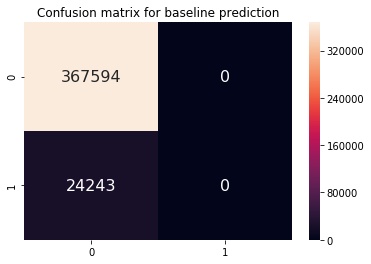

In [75]:
# Baseline Model
y_baseline = y_valid*0
print("All values are filled with Zeroes : " , y_baseline.value_counts())
print ("F-Score is ", f1_score(y_valid, y_baseline))
print("Precision score is " ,precision_score(y_valid, y_baseline) )
print("recall score is " ,recall_score(y_valid, y_baseline) )
result(y_baseline)

conf = confusion_matrix(y_valid, y_baseline)
conf = pd.DataFrame(conf, range(2),range(2))
sns.heatmap(conf, annot=True, fmt='g', annot_kws={"size": 16})
plt.title('Confusion matrix for baseline prediction')
plt.show()

# Count Vectorizer base model

In [7]:
# initalise the vectoriser for Count Vectoriser
cvec1 = CountVectorizer(binary=True, ngram_range=(1, 1))
cvec1.fit(X_total)
#transform training data into sparse matrix
X_train_cvec1 = cvec1.transform(X_total)
cv_lr1 = LogisticRegression()
cv_results1 = cross_validate(cv_lr1, X_train_cvec1[:len(X_total) - len(X_test)],
                                       Y_train, scoring = ('accuracy', 'precision', 'recall', 'f1','roc_auc'), 
                                       cv = num_splits, return_train_score = True)

print_result(cv_results1, num_splits)
scores_cvec1 = pd.DataFrame(cv_results1)
scores_cvec1

C:\Users\amsha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amsha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amsha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amsha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amsha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linea

Average Scores
Accuracy: 0.946550169030299
Precision: 0.641982057996804
Recall: 0.3076970671946542
F_Score: 0.41600189162138557
ROC AUC Mean: 0.913775983421037

Scores Deviation
Accuracy: 0.00032043320011954486
Precision: 0.005486900407273559
Recall: 0.0030075882444681396
F_Score: 0.003699371063739796
ROC AUC Mean: 0.913775983421037


,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1,test_roc_auc,train_roc_auc
0,21.551628,0.366022,0.947053,0.949318,0.650835,0.687362,0.311162,0.331719,0.421031,0.447484,0.912492,0.931055
1,23.350200,0.409905,0.946173,0.949530,0.634559,0.690604,0.306521,0.333808,0.413367,0.450071,0.912953,0.930985
2,22.463930,0.367019,0.946766,0.949321,0.644690,0.688601,0.310976,0.330219,0.419568,0.446377,0.914354,0.930668
3,23.589180,0.361035,0.946299,0.949363,0.639150,0.688350,0.303242,0.331781,0.411330,0.447750,0.914527,0.930717
4,22.815989,0.382974,0.946460,0.949469,0.640678,0.690225,0.306583,0.332493,0.414714,0.448794,0.914555,0.930585


In [8]:
# initalise the vectoriser for Count Vectoriser
cvec2 = CountVectorizer(binary=True, ngram_range=(1, 2))
cvec2.fit(X_total)
#transform training data into sparse matrix
X_train_cvec2 = cvec2.transform(X_total)
cv_lr2 = LogisticRegression()
cv_results2 = cross_validate(cv_lr2, X_train_cvec2[:len(X_total) - len(X_test)],
                                       Y_train, scoring = ('accuracy', 'precision', 'recall', 'f1','roc_auc'), 
                                       cv = num_splits, return_train_score = True)

print_result(cv_results2, num_splits)
scores_cvec2 = pd.DataFrame(cv_results2)
scores_cvec2

C:\Users\amsha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amsha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amsha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amsha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amsha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linea

Average Scores
Accuracy: 0.9479596852963356
Precision: 0.6509807892042717
Recall: 0.3425689889865116
F_Score: 0.4488988559820892
ROC AUC Mean: 0.9173453430051246

Scores Deviation
Accuracy: 0.00017400656918091368
Precision: 0.003778571825125802
Recall: 0.0017100393189085144
F_Score: 0.001369867429268248
ROC AUC Mean: 0.9173453430051246


,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1,test_roc_auc,train_roc_auc
0,108.281497,0.438826,0.948029,0.977299,0.651476,0.955059,0.344079,0.664352,0.450320,0.783612,0.916571,0.988686
1,86.367044,0.403920,0.947811,0.977317,0.646881,0.954653,0.344574,0.664970,0.449639,0.783906,0.916822,0.988607
2,124.484289,0.600394,0.948259,0.977188,0.657350,0.954477,0.341975,0.662913,0.449898,0.782415,0.918089,0.988525
3,106.139592,0.406913,0.947922,0.977335,0.651828,0.955278,0.339748,0.664785,0.446677,0.783987,0.918145,0.988591
4,95.873601,0.459771,0.947777,0.977250,0.647368,0.955271,0.342470,0.663362,0.447961,0.782994,0.917100,0.988591


In [9]:
# initalise the vectoriser for Count Vectoriser
cvec3 = CountVectorizer(binary=True, ngram_range=(1, 3))
cvec3.fit(X_total)
#transform training data into sparse matrix
X_train_cvec3 = cvec3.transform(X_total)
cv_lr3 = LogisticRegression()
cv_results3 = cross_validate(cv_lr3, X_train_cvec3[:len(X_total) - len(X_test)],
                                       Y_train, scoring = ('accuracy', 'precision', 'recall', 'f1','roc_auc'), 
                                       cv = num_splits, return_train_score = True)

print_result(cv_results3, num_splits)
scores_cvec3 = pd.DataFrame(cv_results3)
scores_cvec3

C:\Users\amsha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amsha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amsha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amsha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amsha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linea

Average Scores
Accuracy: 0.9481472634154743
Precision: 0.6575882501272654
Recall: 0.33784185125603267
F_Score: 0.44635668991795674
ROC AUC Mean: 0.9161132827441051

Scores Deviation
Accuracy: 0.0001852050512065366
Precision: 0.003596538518175689
Recall: 0.0016231161917653525
F_Score: 0.0017108310759890483
ROC AUC Mean: 0.9161132827441051


,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1,test_roc_auc,train_roc_auc
0,140.668926,0.678186,0.948328,0.986447,0.660250,0.988580,0.339562,0.790063,0.448476,0.878243,0.915517,0.993918
1,190.653535,0.577455,0.947980,0.986405,0.653356,0.988249,0.339129,0.789661,0.446499,0.877864,0.915764,0.993872
2,149.999190,0.612361,0.948343,0.986337,0.661111,0.988783,0.338696,0.788114,0.447918,0.877117,0.916731,0.993840
3,142.478004,0.660235,0.948202,0.986421,0.660173,0.988972,0.335478,0.789321,0.444882,0.877939,0.916881,0.993845
4,138.479124,0.481712,0.947884,0.986310,0.653051,0.988454,0.336345,0.787928,0.444009,0.876873,0.915674,0.993856


# TFIDF base model

The results are not impressive. CountVectorization has done quite well

In [11]:
# initalise the vectoriser fot TFIDF Vectoriser
tvec1 = TfidfVectorizer(ngram_range=(1, 1),sublinear_tf=True)
# fit the training data on the model
tvec1.fit(X_total)

#transform training data into sparse matrix
X_train_tvec1 = tvec1.transform(X_total)
tv_lr1 = LogisticRegression()
tv_results1 = cross_validate(tv_lr1, X_train_tvec1[:len(X_total) - len(X_test)],
                                    Y_train, scoring = ('accuracy', 'precision', 'recall', 'f1','roc_auc'),
                                    cv = num_splits, return_train_score = True)
print_result(tv_results1, num_splits)

scores_tvec1 = pd.DataFrame(tv_results1)
scores_tvec1

C:\Users\amsha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amsha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amsha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amsha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amsha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linea

Average Scores
Accuracy: 0.9460249500106535
Precision: 0.6481439323785051
Recall: 0.27917336963247125
F_Score: 0.39024965932325467
ROC AUC Mean: 0.9188809348507565

Scores Deviation
Accuracy: 0.0003221541182270418
Precision: 0.006350338816359729
Recall: 0.002697856218705155
F_Score: 0.003572868450993098
ROC AUC Mean: 0.9188809348507565


,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1,test_roc_auc,train_roc_auc
0,8.865410,0.271274,0.946590,0.947250,0.658537,0.669948,0.284000,0.290558,0.396853,0.405326,0.917973,0.929856
1,8.947073,0.276264,0.945702,0.947451,0.641165,0.672133,0.277936,0.294147,0.387776,0.409210,0.917708,0.929917
2,9.589356,0.427861,0.945832,0.947340,0.645713,0.671747,0.275832,0.291130,0.386543,0.406212,0.919789,0.929536
3,8.706717,0.328121,0.946169,0.947207,0.652042,0.668610,0.278617,0.290898,0.390411,0.405411,0.919134,0.929630
4,9.425797,0.300197,0.945832,0.947413,0.643264,0.672463,0.279483,0.292523,0.389665,0.407696,0.919802,0.929518


In [12]:
# initalise the vectoriser fot TFIDF Vectoriser
tvec2 = TfidfVectorizer(ngram_range=(1, 2),sublinear_tf=True)
# fit the training data on the model
tvec2.fit(X_total)

#transform training data into sparse matrix
X_train_tvec2 = tvec2.transform(X_total)
tv_lr2 = LogisticRegression()
tv_results2 = cross_validate(tv_lr2, X_train_tvec2[:len(X_total) - len(X_test)],
                                    Y_train, scoring = ('accuracy', 'precision', 'recall', 'f1','roc_auc'),
                                    cv = num_splits, return_train_score = True)
print_result(tv_results2, num_splits)

scores_tvec2 = pd.DataFrame(tv_results2)
scores_tvec2

C:\Users\amsha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amsha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amsha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amsha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amsha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linea

Average Scores
Accuracy: 0.9454208718198552
Precision: 0.6688153553119895
Recall: 0.2334983294146764
F_Score: 0.3461412336811884
ROC AUC Mean: 0.9221449824061221

Scores Deviation
Accuracy: 0.0002937990216943862
Precision: 0.007923420684504379
Recall: 0.002049648836633619
F_Score: 0.0029478793278474424
ROC AUC Mean: 0.9221449824061221


,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1,test_roc_auc,train_roc_auc
0,20.612880,0.319147,0.945633,0.951702,0.674501,0.786204,0.234377,0.301309,0.347874,0.435655,0.921685,0.959330
1,20.191007,0.386966,0.945266,0.951873,0.662766,0.786101,0.234810,0.305160,0.346765,0.439651,0.920899,0.959293
2,19.908764,0.351060,0.945208,0.951847,0.665651,0.789895,0.229860,0.302051,0.341719,0.436997,0.922984,0.959044
3,21.100576,0.368015,0.945889,0.951750,0.681273,0.786982,0.235676,0.301850,0.350205,0.436340,0.922389,0.959215
4,20.760486,0.368016,0.945108,0.951930,0.659884,0.788839,0.232768,0.304588,0.344143,0.439482,0.922768,0.959128


In [13]:
# initalise the vectoriser fot TFIDF Vectoriser
tvec3 = TfidfVectorizer(ngram_range=(1, 3),sublinear_tf=True)
# fit the training data on the model
tvec3.fit(X_total)

#transform training data into sparse matrix
X_train_tvec3 = tvec3.transform(X_total)
tv_lr3 = LogisticRegression()
tv_results3 = cross_validate(tv_lr3, X_train_tvec3[:len(X_total) - len(X_test)],
                                    Y_train, scoring = ('accuracy', 'precision', 'recall', 'f1','roc_auc'),
                                    cv = num_splits, return_train_score = True)
print_result(tv_results3, num_splits)

scores_tvec3 = pd.DataFrame(tv_results3)
scores_tvec3

C:\Users\amsha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amsha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amsha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amsha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amsha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linea

Average Scores
Accuracy: 0.9432970274112904
Precision: 0.648316698082845
Recall: 0.182576413810172
F_Score: 0.2849021748913884
ROC AUC Mean: 0.9184419964972872

Scores Deviation
Accuracy: 0.0003124642881410047
Precision: 0.009334133092593242
Recall: 0.0034088665584491276
F_Score: 0.004679831178796703
ROC AUC Mean: 0.9184419964972872


,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1,test_roc_auc,train_roc_auc
0,51.790190,0.373003,0.943214,0.950054,0.648148,0.794758,0.179743,0.259838,0.281438,0.391635,0.918181,0.963890
1,46.486690,0.386965,0.943344,0.950209,0.646200,0.796069,0.186239,0.262483,0.289145,0.394793,0.917173,0.963835
2,43.702327,0.361036,0.943156,0.950087,0.647296,0.793893,0.178505,0.261029,0.279839,0.392880,0.919205,0.963618
3,39.108190,0.390955,0.943857,0.950043,0.664540,0.793585,0.186920,0.260240,0.291771,0.391949,0.918813,0.963750
4,50.374295,0.370011,0.942915,0.950232,0.635399,0.797740,0.181475,0.262034,0.282318,0.394490,0.918838,0.963668


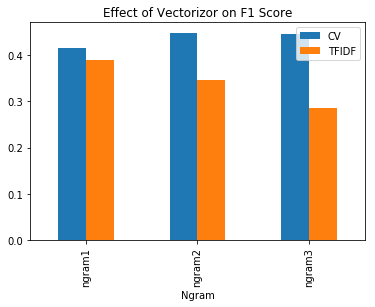

In [14]:
def bar_plot(score,title):
    ngram1 =  ["ngram1",np.mean(scores_cvec1[score]), np.mean(scores_tvec1[score])]
    ngram2 =  ["ngram2",np.mean(scores_cvec2[score]), np.mean(scores_tvec2[score])]
    ngram3 =  ["ngram3",np.mean(scores_cvec3[score]), np.mean(scores_tvec3[score])]
    df1 = pd.DataFrame([ngram1,ngram2,ngram3],columns=["Ngram","CV","TFIDF"])
    df1.set_index("Ngram",inplace=True)
    df1.plot(kind='bar', title =title,legend=True)
    plt.show()
bar_plot('test_f1',"Effect of Vectorizor on F1 Score")

Split the thain dataset into two parts: the large one is used for training models, the smaller one serves as a validation dataset - which is not seen during training, but has labels.

Here our new testing data set will be 0.7 of original train dataset (test_size=0.3), we want proportion of classes to be kept in the new test, and we set the random state for reproducability (random_state=20).

# PIPELINE

Pipelines are a way to streamline a lot of the routine processes, encapsulating little pieces of logic into one function call, which makes it easier to actually do modeling instead just writing a bunch of code. Pipelines allow for experiments, and for a dataset like this that only has the text as a feature, you're going to need to do a lot of experiments. Plus, when your modeling gets really complicated, it's sometimes hard to see if you have any data leakage hiding somewhere. Pipelines are set up with the fit/transform/predict functionality, so you can fit a whole pipeline to the training data and transform to the test data, without having to do it individually for each thing you do.

**Advantages of pipelines**
1. Use of pipelines gives you a kind of meta-language to describe your model and abstract from some implementation details.
2. With pipelines, you don't need to carry test dataset transformation along with your train features - this is taken care of automatically.
3. Hyperparameter tuning made easy - set new parameters on any estimator in the pipeline, and refit - in 1 line. Or use GridSearchCV on the pipeline.

# Creating Pipeline

At first create a very basic first model including both TFIDF and CountVectorizer. 

In this pipeline, input data comes first to CountVectorizer, which creates a sparse matrix of word counts in each sentence. This matrix then serves as input to TfidfTransformer which massages the data and handles it to the LogisticRegression estimator for training and prediction.

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve

pipe1 = Pipeline([
    ('cv', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('logit', LogisticRegression()),
])

**Fitting the model**

In [18]:
pipe1.fit(X_train_part, y_train_part)

C:\Users\amsha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
     steps=[('cv', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_a...penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

**Making Prediction**  

In [19]:
from sklearn.metrics import f1_score
pred1 = pipe1.predict(X_valid)
f1_score(y_valid, pred1)

0.4697824335213537

Confusion Matrix :
[[363352   4242]
 [ 15498   8745]]
Accuracy Score : 0.9496219091101658
Report : 
              precision    recall  f1-score   support

           0       0.96      0.99      0.97    367594
           1       0.67      0.36      0.47     24243

   micro avg       0.95      0.95      0.95    391837
   macro avg       0.82      0.67      0.72    391837
weighted avg       0.94      0.95      0.94    391837



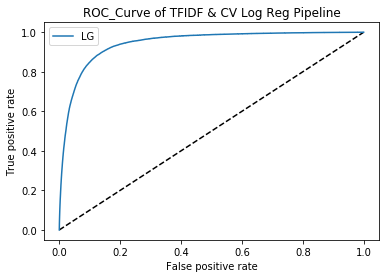

In [89]:
result(pred1)
roccurve('LG','ROC_Curve of TFIDF & CV Log Reg Pipeline',pipe1)

Best fscore is  0.5818326572392615 and optimum Threshold is  0.23753753753753754
F-Score is  0.5818326572392615
Precision score is  0.538283469538073
recall score is  0.6330487150930165


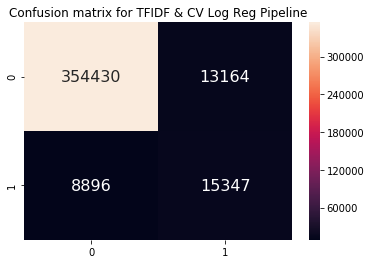

In [91]:
pred11 = pipe1.predict_proba(X_valid)
fhighest = 0
threbest = 0
thres = np.linspace(.001, .95, 1000)
for t in thres:
    y_pred = (pred11[:,1] > t).astype(int)
    fs = f1_score(y_valid, y_pred)
    if fs > fhighest:
        fhighest = fs
        threbest = t
print ("Best fscore is ", fhighest , "and optimum Threshold is ", threbest)

pred111 = (predx[:,1] > threbest).astype(int)


print ("F-Score is ", f1_score(y_valid, pred111))
print("Precision score is " ,precision_score(y_valid, pred111) )
print("recall score is " ,recall_score(y_valid, pred111) )

conf = confusion_matrix(y_valid, pred111)
conf = pd.DataFrame(conf, range(2),range(2))
sns.heatmap(conf, annot=True, fmt='g', annot_kws={"size": 16})
plt.title('Confusion matrix for TFIDF & CV Log Reg Pipeline')
plt.show()

f1 score for BernouliNB is , 0.5038141470180305
Confusion Matrix :
[[357317  10277]
 [ 12619  11624]]
Accuracy Score : 0.9415675395636451
Report : 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97    367594
           1       0.53      0.48      0.50     24243

   micro avg       0.94      0.94      0.94    391837
   macro avg       0.75      0.73      0.74    391837
weighted avg       0.94      0.94      0.94    391837



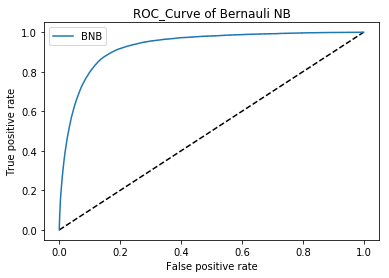

In [25]:
pipe2 = Pipeline([
    ('cv', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('bnb', BernoulliNB()),
])

pipe2.fit(X_train_part, y_train_part)
pred2 = pipe2.predict(X_valid)
print("f1 score for BernouliNB is ," ,f1_score(y_valid, pred2))

result(pred2)
roccurve('BNB','ROC_Curve of Bernauli NB',pipe2)

Best fscore is  0.5265237408094552 and optimum Threshold is  0.15014214214214214
F-Score is  0.5265237408094552
Precision score is  0.4511466336954282
recall score is  0.6321412366456297
Accuracy score is  0.9296595267930288


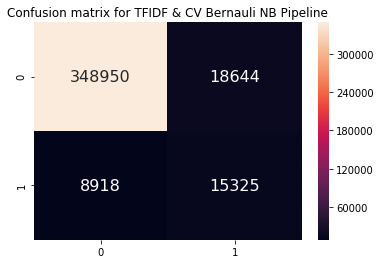

In [92]:
pred22 = pipe2.predict_proba(X_valid)
fhighest2 = 0
threbest2 = 0
thres2 = np.linspace(.001, .95, 1000)
for t in thres2:
    y_pred22 = (pred22[:,1] > t).astype(int)
    fs = f1_score(y_valid, y_pred22)
    if fs > fhighest2:
        fhighest2 = fs
        threbest2 = t
print ("Best fscore is ", fhighest2 , "and optimum Threshold is ", threbest2)

pred222 = (pred22[:,1] > threbest2).astype(int)


print ("F-Score is ", f1_score(y_valid, pred222))
print("Precision score is " ,precision_score(y_valid, pred222) )
print("recall score is " ,recall_score(y_valid, pred222) )
print("Accuracy score is " ,accuracy_score(y_valid, pred222) )

conf = confusion_matrix(y_valid, pred222)
conf = pd.DataFrame(conf, range(2),range(2))
sns.heatmap(conf, annot=True, fmt='g', annot_kws={"size": 16})
plt.title('Confusion matrix for TFIDF & CV Bernauli NB Pipeline')
plt.show()

Bernauli Naive Bayes given us qite a good result. The F1 score went more that .50 this time, without doing any Hyperparameter Tuning. Lets try to do this to up our score

# HyperParameter Tuning with Logistic Regression

In [51]:
from sklearn.model_selection import GridSearchCV

hyperparameters = { 'cv__max_df': [0.9, 0.95,1],
#                    'cv__min_df': [0.9, 0.95,1],   
                    'cv__ngram_range': [(1,1), (1,2),(1,3)],
#                    'cv__max_features' : np.linspace(5000, 50000, 5),
#                    'cv__binary': [False,True],
                    'logit__C': [1.0,1.5,2.0,2.5],
#                    'logit__penalty': ['l2','l1'],
#                    'logit__max_iter' : [100,110,120,130,140]                    
                  }
clf = GridSearchCV(pipe1, hyperparameters, cv=3, n_jobs=-1)
clf

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('cv', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_a...penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'cv__max_df': [0.9, 0.95, 1], 'cv__ngram_range': [(1, 1), (1, 2), (1, 3)], 'logit__C': [1.0, 1.5, 2.0, 2.5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [52]:
clf.fit(X_train_part, y_train_part)

C:\Users\amsha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('cv', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_a...penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'cv__max_df': [0.9, 0.95, 1], 'cv__ngram_range': [(1, 1), (1, 2), (1, 3)], 'logit__C': [1.0, 1.5, 2.0, 2.5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

# Analysis of GridSearchCV of LogReg

In [53]:
print(clf.best_estimator_.named_steps['logit'])
print(clf.best_estimator_.named_steps['cv'])
print("The best score is ",clf.best_score_)

LogisticRegression(C=2.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.9, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)
The best score is  0.9502748049021913


f1 score for GridCV using Logistic Regression is , 0.49411826077884136
Confusion Matrix :
[[362970   4624]
 [ 14771   9472]]
Accuracy Score : 0.9505023772640154
Report : 
              precision    recall  f1-score   support

           0       0.96      0.99      0.97    367594
           1       0.67      0.39      0.49     24243

   micro avg       0.95      0.95      0.95    391837
   macro avg       0.82      0.69      0.73    391837
weighted avg       0.94      0.95      0.94    391837



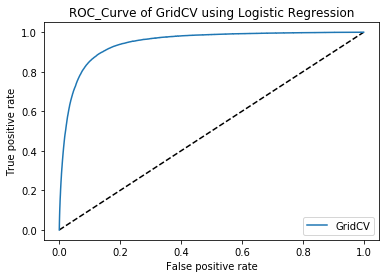

In [54]:
pred3 = clf.predict(X_valid)
print("f1 score for GridCV using Logistic Regression is ," ,f1_score(y_valid, pred3))

result(pred3)
roccurve('GridCV','ROC_Curve of GridCV using Logistic Regression',clf)

Best fscore is  0.5880721220527045 and optimum Threshold is  0.23278778778778778
F-Score is  0.5880721220527045
Precision score is  0.5329847144006437
recall score is  0.6558594233386957
Accuracy score is  0.9431523822405745


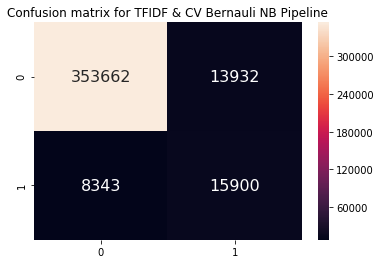

In [94]:
pred33 = clf.predict_proba(X_valid)
fhighest3 = 0
threbest3 = 0
thres3 = np.linspace(.001, .95, 1000)
for t in thres3:
    y_pred33 = (pred33[:,1] > t).astype(int)
    fs = f1_score(y_valid, y_pred33)
    if fs > fhighest3:
        fhighest3 = fs
        threbest3 = t
print ("Best fscore is ", fhighest3 , "and optimum Threshold is ", threbest3)

pred333 = (pred33[:,1] > threbest3).astype(int)


print ("F-Score is ", f1_score(y_valid, pred333))
print("Precision score is " ,precision_score(y_valid, pred333) )
print("recall score is " ,recall_score(y_valid, pred333) )
print("Accuracy score is " ,accuracy_score(y_valid, pred333) )

conf = confusion_matrix(y_valid, pred333)
conf = pd.DataFrame(conf, range(2),range(2))
sns.heatmap(conf, annot=True, fmt='g', annot_kws={"size": 16})
plt.title('Confusion matrix for TFIDF & CV Bernauli NB Pipeline')
plt.show()

# HyperParameter Tuning with Naive Bayes

In [49]:
hyperparameters = { 'cv__max_df': [0.9, 0.95,1],
#                    'cv__min_df': [0.9, 0.95,1],   
                    'cv__ngram_range': [(1,1), (1,2),(1,3)],
#                    'cv__max_features' : np.linspace(5000, 50000, 5),
#                    'cv__binary': [False,True],
                    'bnb__alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0],
#                    'logit__penalty': ['l2','l1'],
#                    'logit__max_iter' : [100,110,120,130,140]                    
                  }
clf1 = GridSearchCV(pipe2, hyperparameters, cv=3, n_jobs=-1)
clf1

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('cv', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_a...se, use_idf=True)), ('bnb', BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'cv__max_df': [0.9, 0.95, 1], 'cv__ngram_range': [(1, 1), (1, 2), (1, 3)], 'bnb__alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [50]:
clf1.fit(X_train_part, y_train_part)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('cv', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_a...se, use_idf=True)), ('bnb', BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'cv__max_df': [0.9, 0.95, 1], 'cv__ngram_range': [(1, 1), (1, 2), (1, 3)], 'bnb__alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

# Analysis of GridSearchCV of Naive Bayes

In [56]:
print(clf1.best_estimator_.named_steps['bnb'])
print(clf1.best_estimator_.named_steps['cv'])
print("The best score is ",clf1.best_score_)

BernoulliNB(alpha=0.1, binarize=0.0, class_prior=None, fit_prior=True)
CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.9, max_features=None, min_df=1,
        ngram_range=(1, 3), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)
The best score is  0.9463788643584877


f1 score for GridCV using Naive Bayes is , 0.425615763546798
Confusion Matrix :
[[363073   4521]
 [ 16467   7776]]
Accuracy Score : 0.9464369112666746
Report : 
              precision    recall  f1-score   support

           0       0.96      0.99      0.97    367594
           1       0.63      0.32      0.43     24243

   micro avg       0.95      0.95      0.95    391837
   macro avg       0.79      0.65      0.70    391837
weighted avg       0.94      0.95      0.94    391837



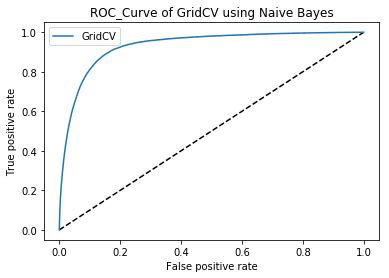

In [57]:
pred4 = clf1.predict(X_valid)
print("f1 score for GridCV using Naive Bayes is ," ,f1_score(y_valid, pred4))

result(pred4)
roccurve('GridCV','ROC_Curve of GridCV using Naive Bayes',clf1)